In [1]:
# at the moment, best way to extract some features and evaluate them
# is using AlignedFeatureData class
from pystoms.aligned_feature_data import AlignedFeatureData
# import a model
from pystoms.models_3d.model_3d_m1 import ModelM1
# Data handling is done by proteolizarddata (https://github.com/theGreatHerrLebert/proteolizard-data)
from proteolizarddata.data import PyTimsDataHandleDDA
# for generating random feature ids
import matplotlib.pyplot as plt
import arviz as az
plt.style.use("ggplot")
import numpy as np
random_seed = 2022
rng = np.random.default_rng(random_seed)

2022-09-23 16:08:40.559932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-23 16:08:40.663957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-23 16:08:40.663978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-23 16:08:40.686362: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-23 16:08:41.157632: W tensorflow/stream_executor/platform/de

In [52]:
import pandas as pd
import seaborn as sns

In [2]:
# get data
data_path = "/home/tim/Workspaces/MassSpecDaten/M210115_001_Slot1-1_1_850.d/"
data_handle = PyTimsDataHandleDDA(data_path)

In [3]:
total_features = 1
feature_ids = np.random.randint(1000,4001,size=total_features)

In [4]:
aligned_features = AlignedFeatureData(
                            data_handle,
                            ids=feature_ids,
                            is_parallel=False)

In [5]:
# create model
model = ModelM1(aligned_features,random_number_generator=rng)


In [6]:
# no the model can be sampled
sample_trace = model.evaluation(prior_pred_out=True,posterior_pred_out=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [i_t, i_s, ms_mz, ms_s, alpha, me]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 50 seconds.
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'iso

/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'isotopic_peak' which was initialized as a mutable dimension by another variable ('charge'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)


/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'data_point' which was initialized as a mutable dimension by another variable ('intensity'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
/home/tim/miniconda3/envs/pymc_stable/lib/python3.10/site-packages/pymc/model.py:1879: ShapeWarning: You are resizing a variable with dimension 'isotopic_peak' which was initialized as a mutable dimension by another variable ('charge'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)


In [7]:
idata = sample_trace[0]

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'ms_s'}>,
        <AxesSubplot:title={'center':'i_s'}>],
       [<AxesSubplot:title={'center':'me'}>,
        <AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'ms_mz'}>],
       [<AxesSubplot:title={'center':'i_t'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

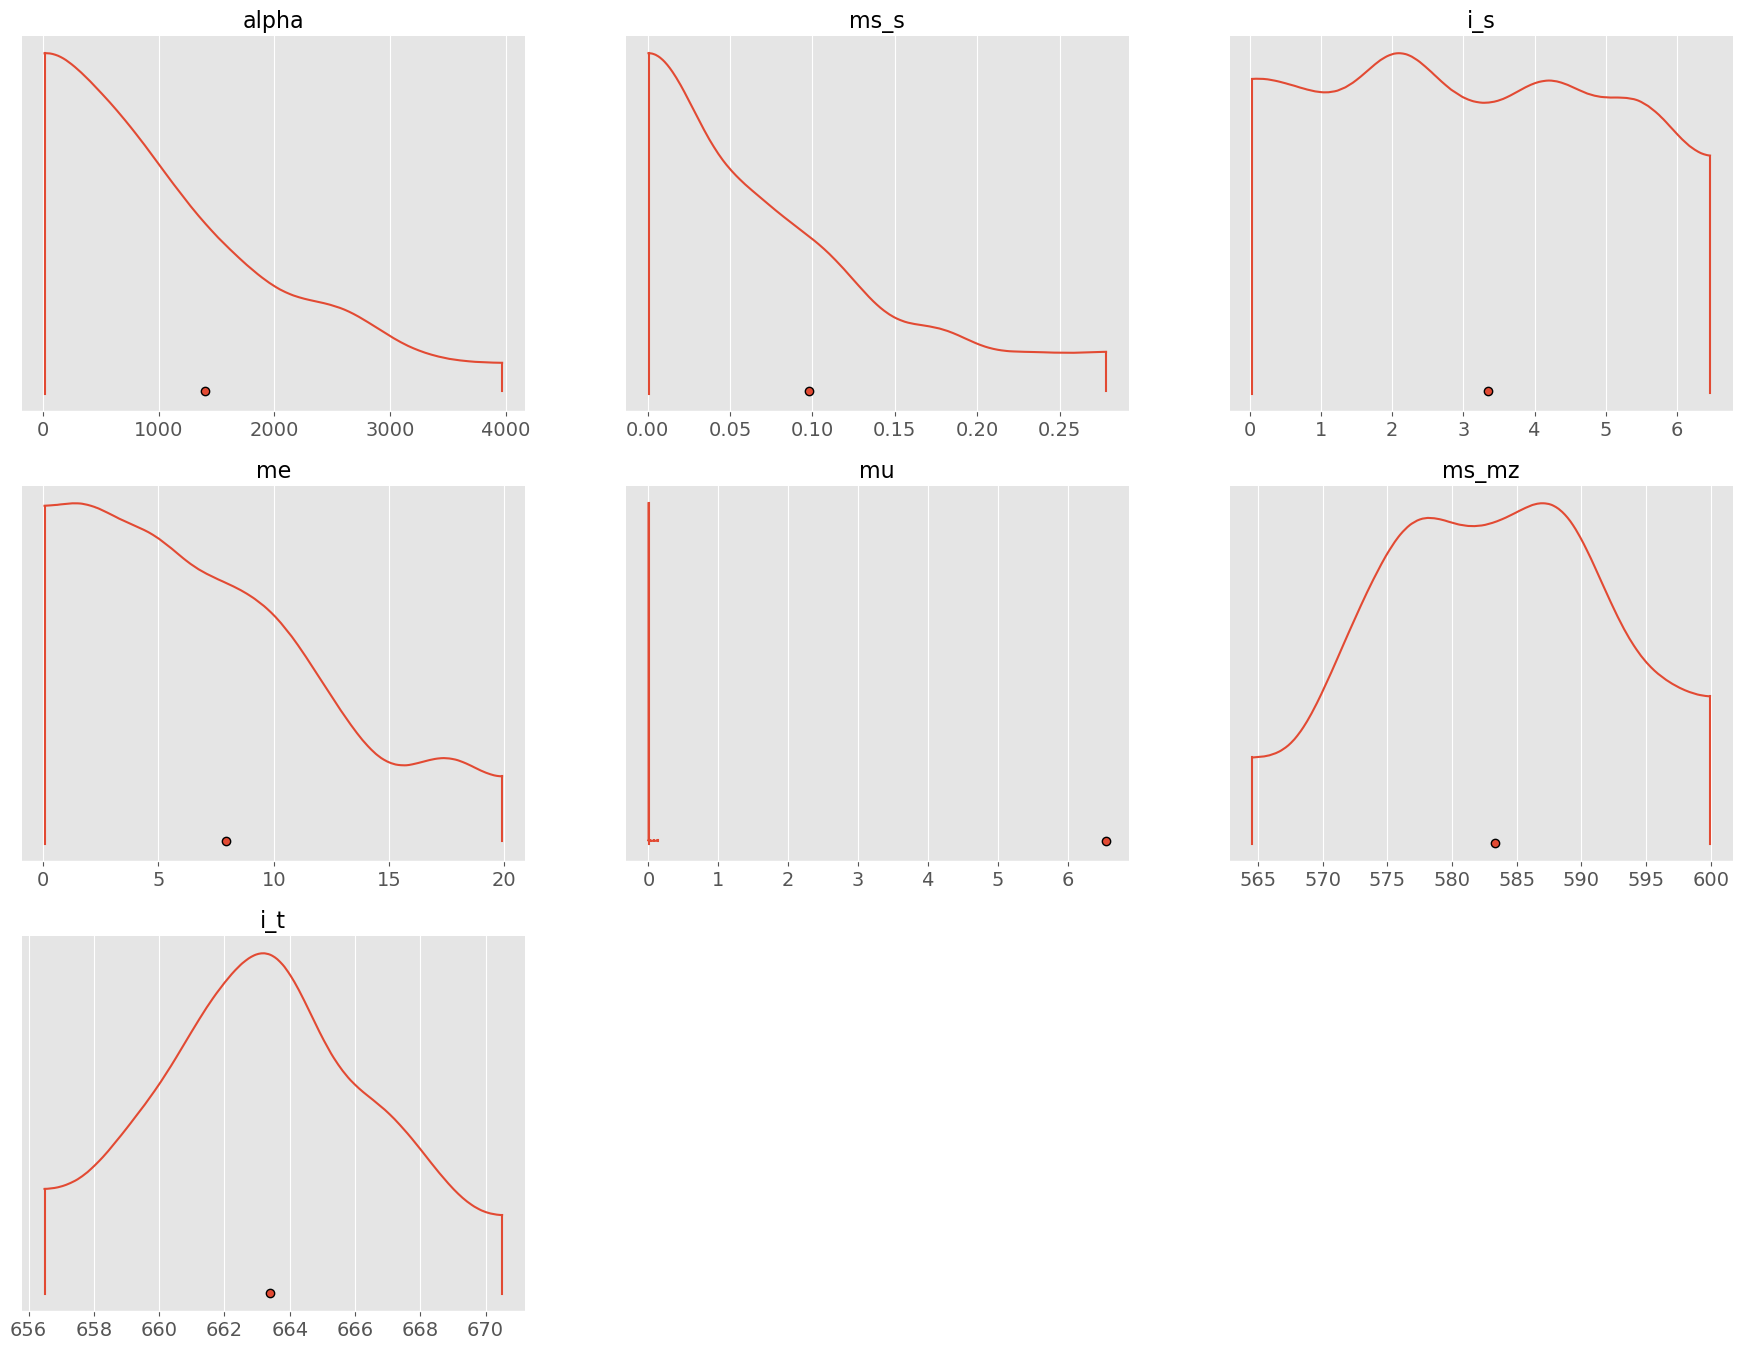

In [65]:
az.plot_density(idata.prior.isel({"feature":0,"isotopic_peak":0,"data_point":0}))

In [9]:
idata_prior_predictions_constant_data_sliced = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0})
idata_prior_predictions_sliced = idata.prior_predictions.isel({"feature":0})
x_prior = idata_prior_predictions_constant_data_sliced.mz.values
y_prior = idata_prior_predictions_sliced.mu.values

In [10]:
y_prior.shape

(1, 500, 50000)

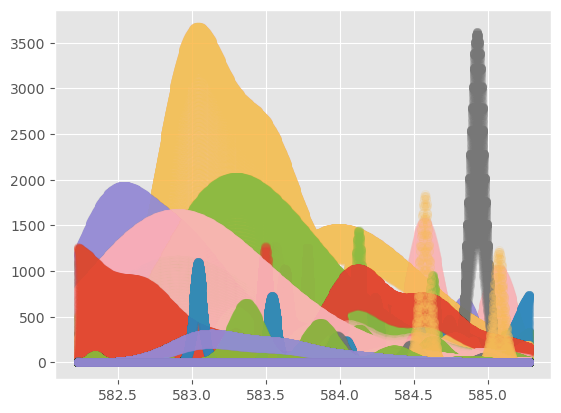

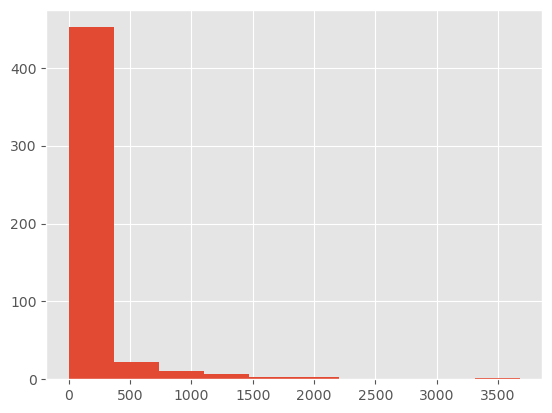

In [11]:
max_ys_prior = []
all_near_zero_idx_prior = []
some_over_zero_idx_prior = []

for draw in range(500):
        y_selected_prior = y_prior[0,draw,:]
        if np.all(y_selected_prior<=100):
            all_near_zero_idx_prior.append(draw)
        else:
            some_over_zero_idx_prior.append(draw)
        max_ys_prior.append(np.max(y_selected_prior))
        plt.scatter(x_prior,y_selected_prior,alpha=0.1)
plt.show()
plt.hist(max_ys_prior)
plt.show()

In [14]:
len(all_near_zero_idx_prior)
all_near_zero_idx_prior

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 84,
 85,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 111,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 152,
 153,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 176,
 177,
 178,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 

array([[<AxesSubplot:title={'center':'alpha\n2158'}>,
        <AxesSubplot:title={'center':'ms_s\n2158'}>,
        <AxesSubplot:title={'center':'i_s\n2158'}>],
       [<AxesSubplot:title={'center':'me\n2158'}>,
        <AxesSubplot:title={'center':'mu\n2158'}>,
        <AxesSubplot:title={'center':'ms_mz\n2158'}>],
       [<AxesSubplot:title={'center':'i_t\n2158'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

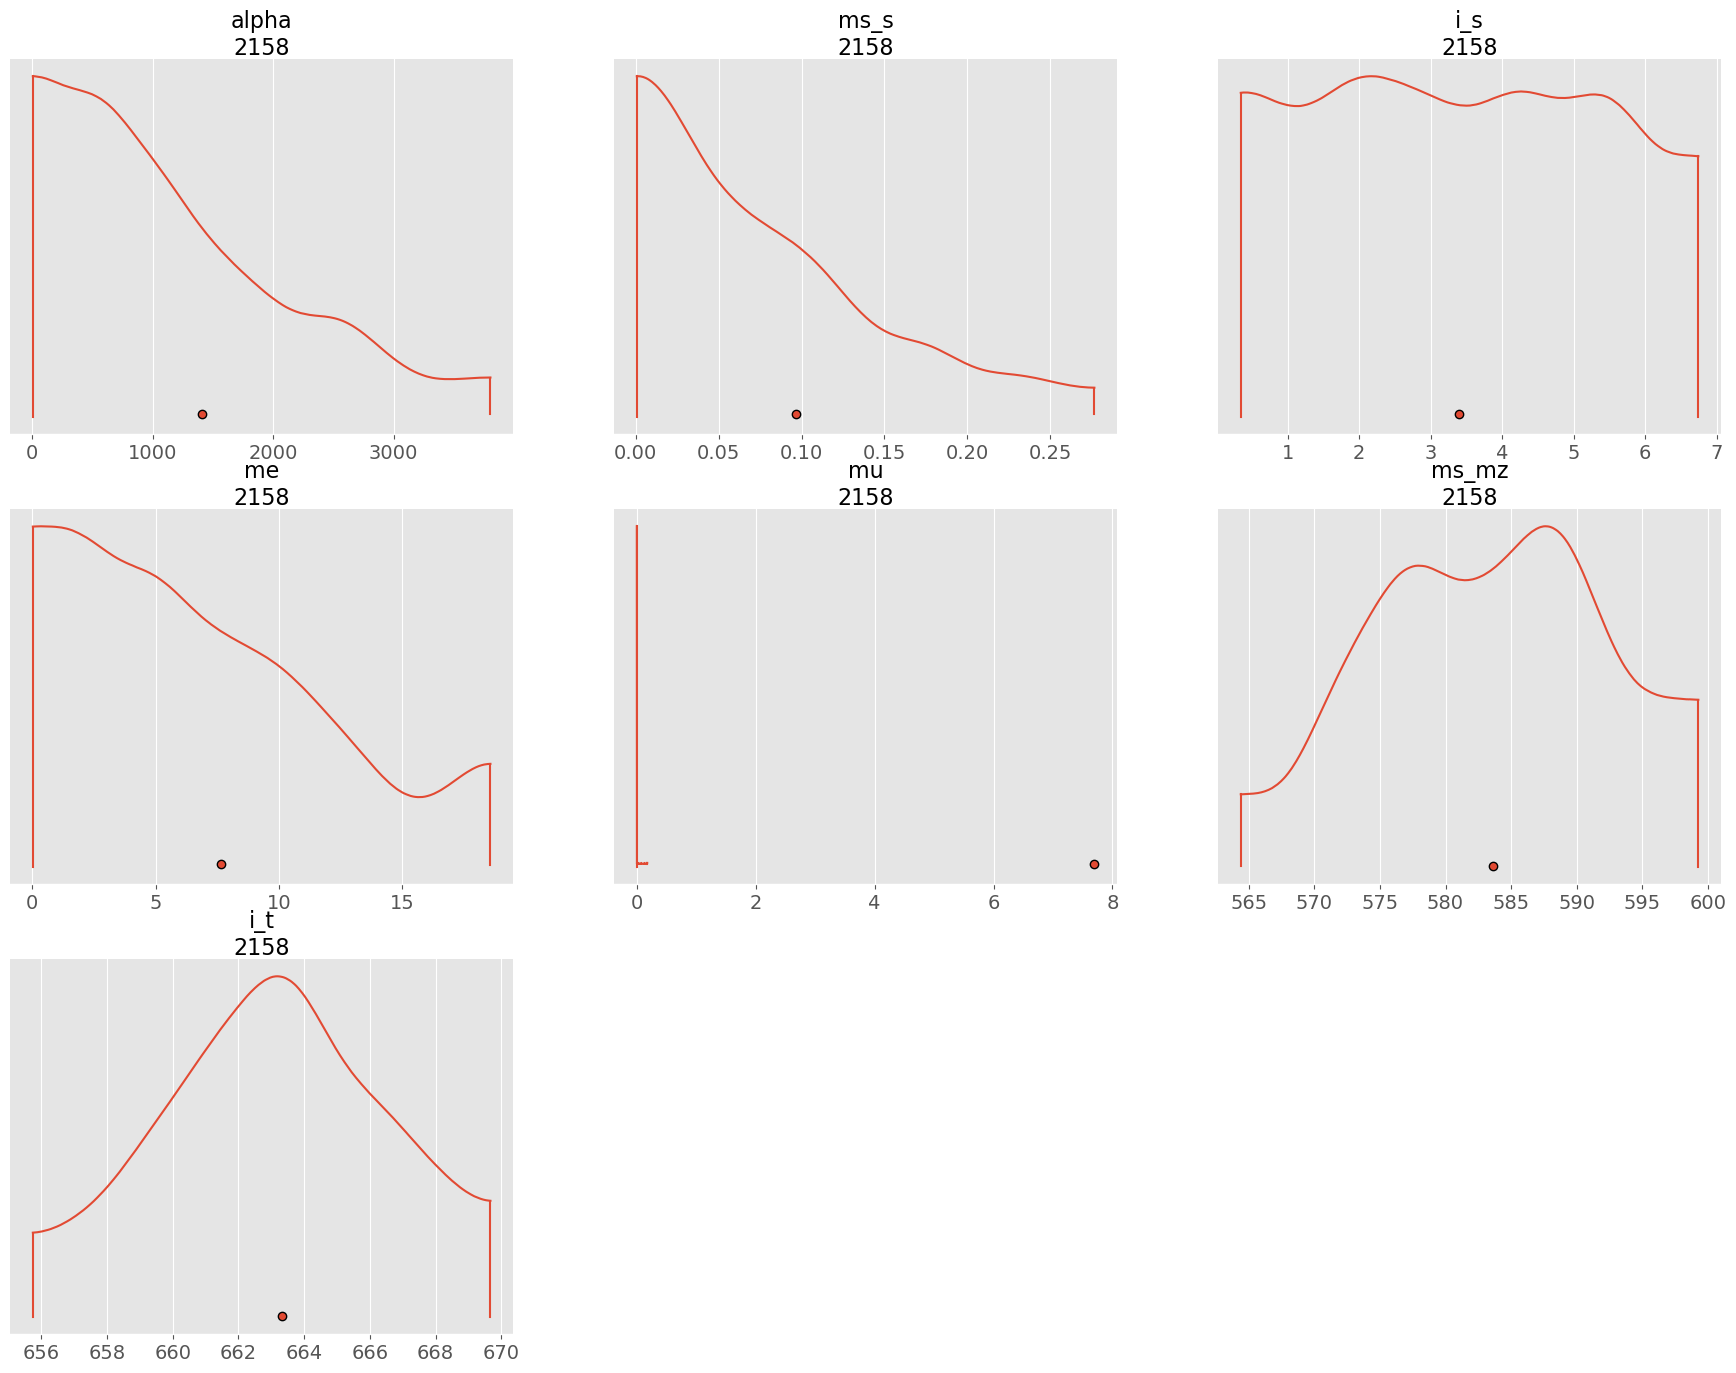

In [56]:

zero_prior = idata.prior.sel({"draw":all_near_zero_idx_prior,"data_point":0,"isotopic_peak":0})
az.plot_density(zero_prior)

In [23]:
from ast import Lambda
from scipy.special import factorial
zero_draw = idata.prior.isel({"draw":497})
charge = idata.constant_data.charge.values.flatten()[0]
a = zero_draw.alpha.values.flatten()[0]
i_t = zero_draw.i_t.values.flatten()[0]
i_s = zero_draw.i_s.values.flatten()[0]
mz_mu = zero_draw.ms_mz.values.flatten()[0]
mz_s = zero_draw.ms_s.values.flatten()[0]
peaks = np.arange(6)
λ = 0.000594 * (charge) * mz_mu - 0.03091
w = λ**peaks/factorial(peaks)*np.exp(-λ)
pos = peaks/charge +mz_mu


In [29]:
def f(mz,mob):
    part1 = np.exp(
            -((i_t - mob) ** 2) / (2 * i_s**2)
                    )
    part2 = np.sum(
            w* np.exp(-((pos - mz) ** 2) / (2 * mz_s**2)))
    return a*part1*part2

In [45]:
grid_x = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).mz.values
grid_y = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0}).scan.values

<AxesSubplot:xlabel='Mz', ylabel='Intensity'>

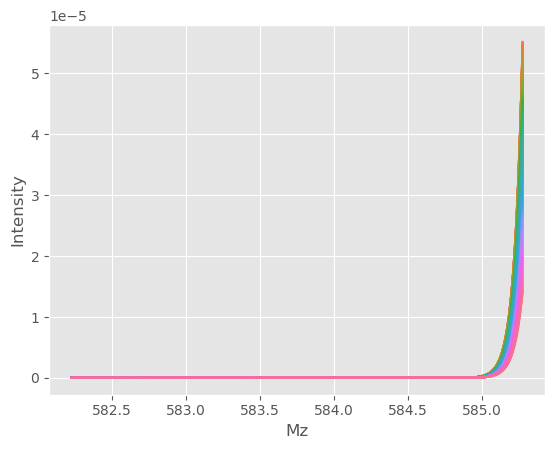

In [53]:
z = np.zeros_like(grid_x)
for idx,(x,y) in enumerate(zip(grid_x,grid_y)):
    z[idx] = f(x,y)

df = pd.DataFrame({"Scan":grid_y,"Mz":grid_x,"Intensity":z})
sns.lineplot(x = df.Mz,y = df.Intensity,hue=df.Scan.values.astype("str"),legend=False)

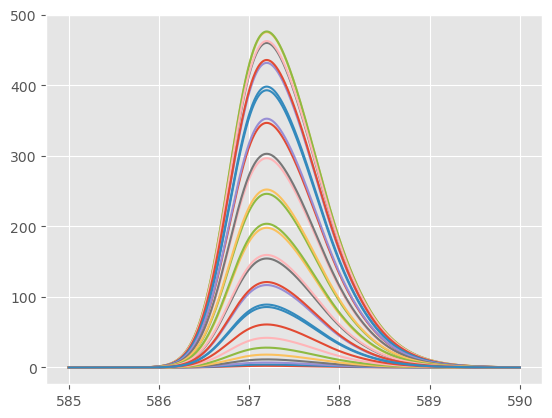

In [33]:
for mob in range(640,670):
    #mob=658.6
    mzs = np.linspace(585,590,10000)
    fs = np.zeros_like(mzs)
    for idx,mz in enumerate(mzs):
        fs[idx]= f(mz,mob)
    plt.plot(mzs,fs)
plt.show()

In [ ]:
not_zero_prior = idata.prior.sel({"draw":some_over_zero_idx_prior,"data_point":0,"isotopic_peak":0})

az.plot_density(not_zero_prior)
az.plot_pair(not_zero_prior)

In [ ]:
idata_predictions_constant_data_sliced = idata.predictions_constant_data.isel({"feature":0,"isotopic_peak":0})
idata_predictions_sliced = idata.predictions.isel({"feature":0})
x = idata_predictions_constant_data_sliced.mz.values
y = idata_predictions_sliced.mu.values

In [ ]:
max_ys = []
all_near_zero_idx = []
for i in range(4):
    print(f"chain={i}")
    for draw in range(1000):
        y_selected = y[i,draw,:]
        if np.all(y_selected<=1):
            all_near_zero_idx.append((i,draw))
        max_ys.append(np.max(y_selected))
        plt.scatter(x,y_selected,alpha=0.1)
    plt.show()
    plt.hist(max_ys)
    plt.show()

In [ ]:
len(all_near_zero_idx)

In [ ]:
all_zero_idx_chain0 = []
all_zero_idx_chain1 = []
all_zero_idx_chain2 = []
all_zero_idx_chain3 = []

for c,idx in all_near_zero_idx:
    if c == 0:
        all_zero_idx_chain0.append(idx)
    elif c == 1:
        all_zero_idx_chain1.append(idx)
    elif c == 2:
        all_zero_idx_chain2.append(idx)
    elif c == 3:
        all_zero_idx_chain3.append(idx)
zero_posterior_chain0 = idata.posterior.sel({"draw":all_zero_idx_chain0})
zero_posterior_chain1 = idata.posterior.sel({"draw":all_zero_idx_chain1})
zero_posterior_chain2 = idata.posterior.sel({"draw":all_zero_idx_chain2})
zero_posterior_chain3 = idata.posterior.sel({"draw":all_zero_idx_chain3})

az.plot_posterior(zero_posterior_chain0)
plt.show()
az.plot_posterior(zero_posterior_chain1)
plt.show()
az.plot_posterior(zero_posterior_chain2)
plt.show()
az.plot_posterior(zero_posterior_chain3)
plt.show()

In [ ]:
model.arviz_plots(save_fig=False)

In [ ]:

az.plot_lm(y=sample_trace[0].observed_data.obs,y_hat=sample_trace[0].posterior_predictive.obs,plot_dim="data_point",num_samples=500)


In [ ]:
fig,ax = plt.subplots(1,1)
az.plot_lm(y=sample_trace[0].observed_data.obs,y_hat=sample_trace[0].prior_predictive.obs,plot_dim="data_point",num_samples=500,legend=False,axes=ax)
h,l = ax.get_legend_handles_labels()
for idx,lab in enumerate(l):
    if lab == "Posterior predictive samples":
        l[idx] = "Prior predictive samples"
ax.legend(h,l)

In [ ]:
az.plot_parallel(sample_trace[0],norm_method="minmax")